In [11]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [40]:
df = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\train.csv", usecols = ['Age', 'Fare','Survived'])

In [41]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [43]:
# fill the NA Value 
df['Age'].fillna(df['Age'].mean(),inplace = True)

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_5276\1720326904.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace = True)


In [44]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_5276\3282408660.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


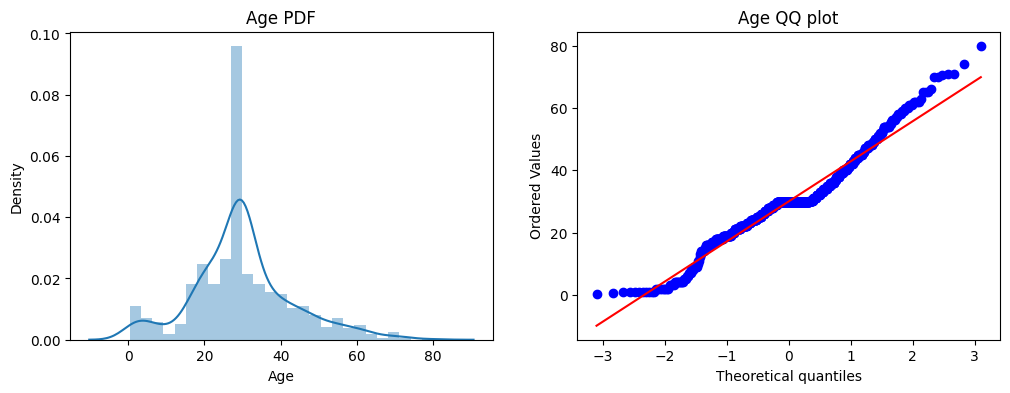

In [51]:
plt.figure(figsize = (12,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Age'],dist = 'norm', plot = plt)
plt.title("Age QQ plot")

plt.show()

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_5276\3360561368.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


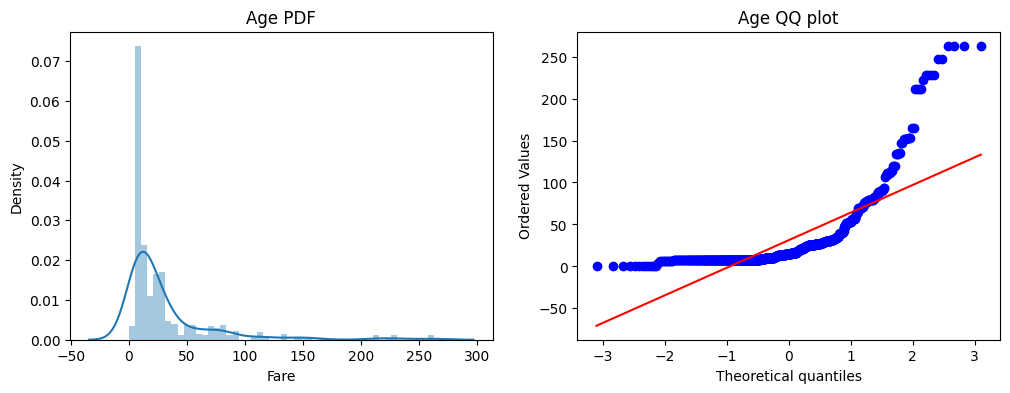

In [52]:
plt.figure(figsize = (12,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Fare'],dist = 'norm', plot = plt)
plt.title("Age QQ plot")

plt.show()

In [53]:
clf = LogisticRegression()
clf2= DecisionTreeClassifier()

In [55]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy LR", accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy LR 0.6815642458100558


In [56]:
trf = FunctionTransformer(func=np.log1p)

In [66]:
X_train_transfromed = trf.fit_transform(X_train)
X_test_transfromed = trf.transform(X_test)

In [67]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transfromed,y_train)
clf2.fit(X_train_transfromed,y_train)

y_pred = clf.predict(X_test_transfromed)
y_pred1 = clf2.predict(X_test_transfromed)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred1))

Accuracy LR 0.6983240223463687
Accuracy DT 0.7039106145251397


In [70]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf,X_transformed,y,scoring = 'accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2,X_transformed,y,scoring = 'accuracy', cv=10)))

LR 0.678027465667915
DT 0.6555181023720349


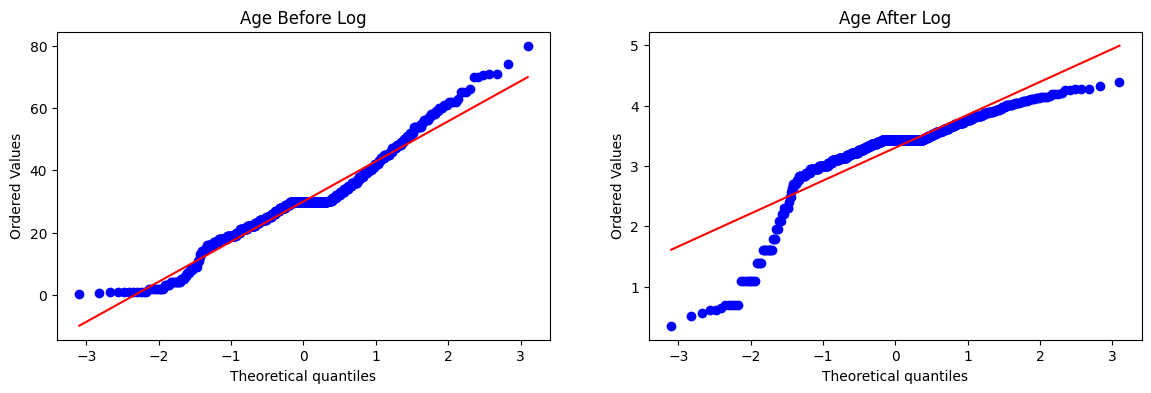

In [77]:
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist = 'norm', plot = plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transfromed['Age'], dist='norm', plot=plt)
plt.title('Age After Log')
plt.show()

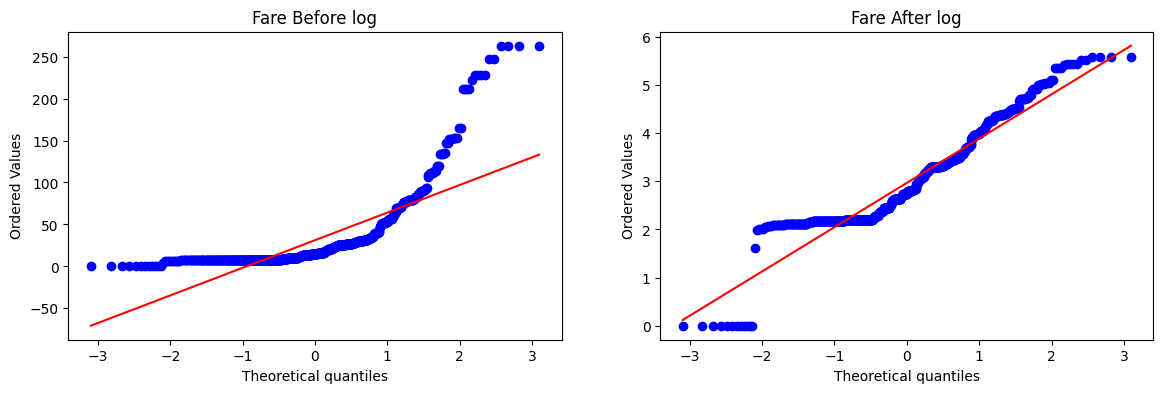

In [74]:
plt.figure(figsize =(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],plot=plt)
plt.title("Fare Before log")

plt.subplot(122)
stats.probplot(X_train_transfromed['Fare'],plot = plt)
plt.title('Fare After log')
plt.show()

In [78]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [81]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred1 = clf2.predict(X_test_transformed2)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred1))

Accuracy LR 0.6927374301675978
Accuracy DT 0.6815642458100558


In [82]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf,X_transformed2,y,scoring = 'accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2,X_transformed2,y,scoring = 'accuracy', cv=10)))

LR 0.6712609238451936
DT 0.6565917602996254


In [83]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6431335830212235


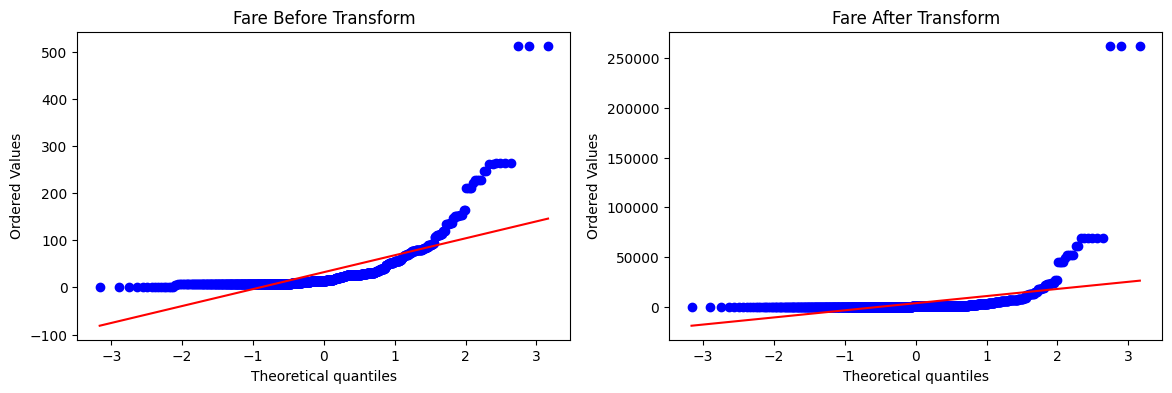

In [84]:
apply_transform(lambda X:X**2)

Accuracy 0.6589013732833957


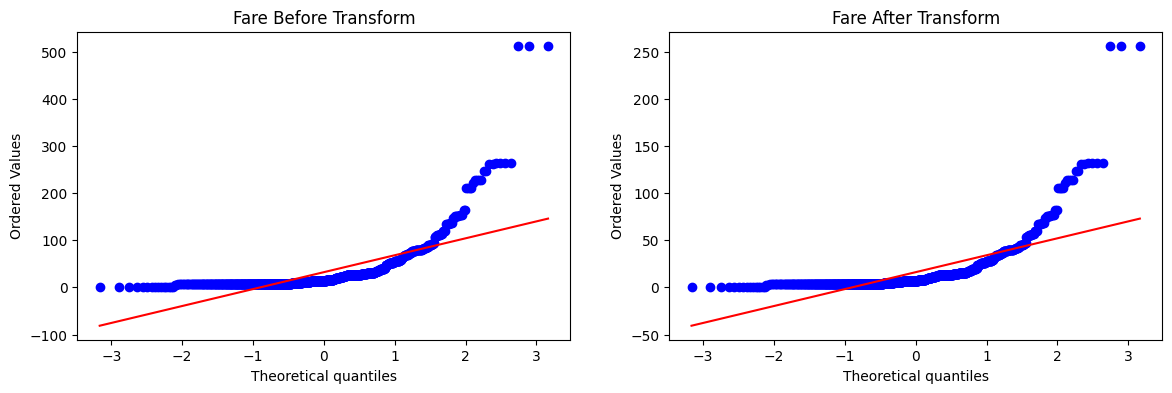

In [92]:
apply_transform(lambda X:X**1/2)

Accuracy 0.61729088639201


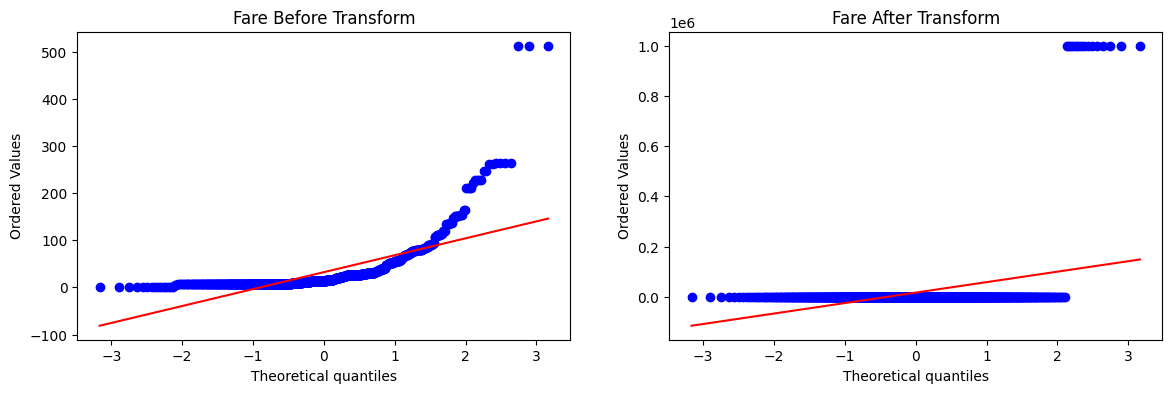

In [96]:
apply_transform(lambda X: 1/(X+0.000001))

Accuracy 0.6195131086142323


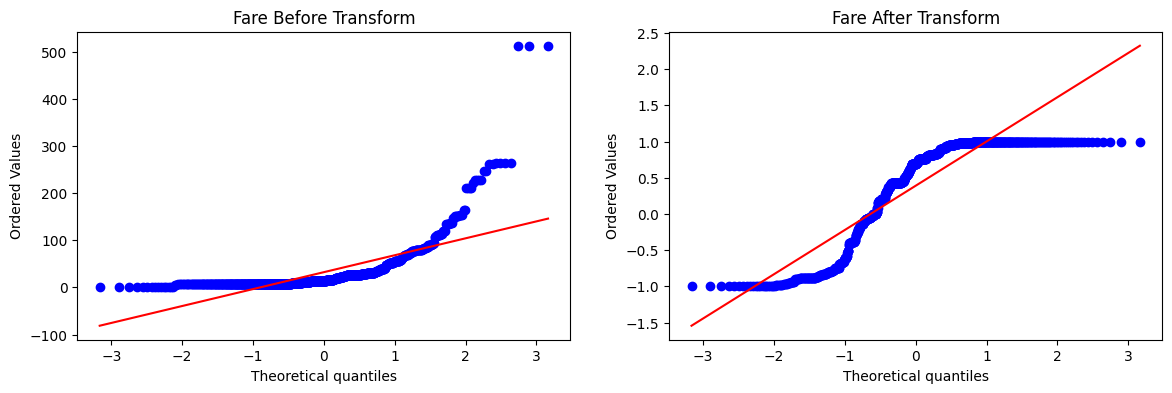

In [97]:
apply_transform(np.sin)

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_4220\1934002811.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='blue', shade=True, ax=axes[0, 1])
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_4220\1934002811.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sqrt_transformed_data, color='red', shade=True, ax=axes[1, 1])


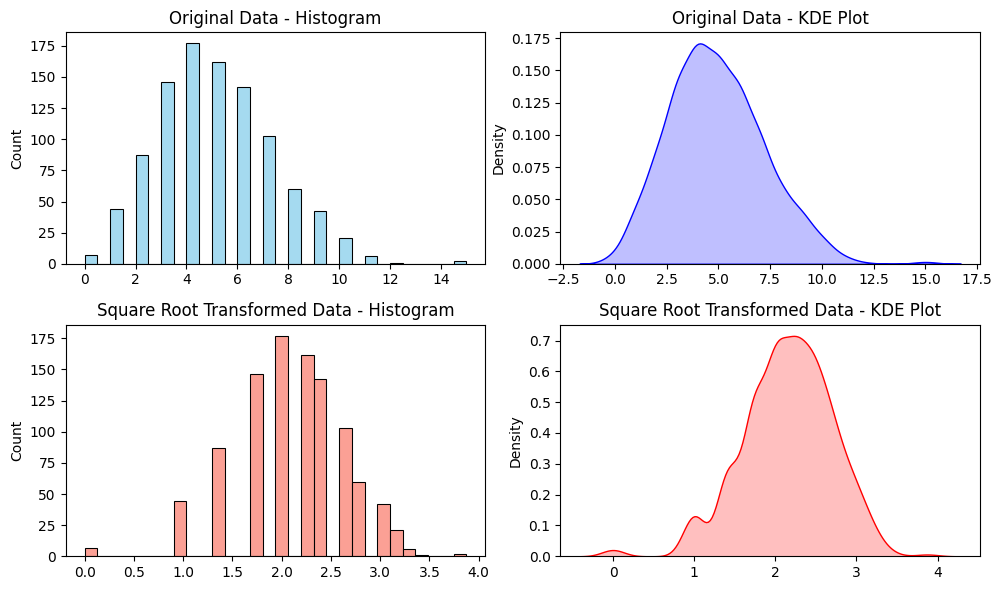

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample skewed data (counts)
data = np.random.poisson(lam=5, size=1000)

# Apply square root transformation
sqrt_transformed_data = np.sqrt(data)

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Original Data - Histogram
sns.histplot(data, bins=30, kde=False, color='skyblue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title("Original Data - Histogram")

# Original Data - KDE Plot
sns.kdeplot(data, color='blue', shade=True, ax=axes[0, 1])
axes[0, 1].set_title("Original Data - KDE Plot")

# Transformed Data - Histogram
sns.histplot(sqrt_transformed_data, bins=30, kde=False, color='salmon', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title("Square Root Transformed Data - Histogram")

# Transformed Data - KDE Plot
sns.kdeplot(sqrt_transformed_data, color='red', shade=True, ax=axes[1, 1])
axes[1, 1].set_title("Square Root Transformed Data - KDE Plot")

# Adjust layout
plt.tight_layout()
plt.show()




The square root transformation is used to reduce the skewness of a dataset, particularly when dealing with moderately skewed data or Poisson-distributed data (count data). It helps stabilize variance and make the data more normally distributed.

*****📌 When to Use Square Root Transformation*****

**1️⃣ Right-Skewed Data (Moderate Skewness)**

If your data is positively skewed, applying a square root transformation can reduce skewness and make it closer to a normal distribution.

**2️⃣ Poisson-Distributed Data (Counts)**

If your data consists of count values (e.g., number of customer complaints, number of sales per day, etc.), the square root transformation can help stabilize variance.

**3️⃣ Heteroscedasticity (Unequal Variance)**

If your data has heteroscedasticity (changing variance across different levels), applying a square root transformation can reduce variance differences and make modeling more effective.


# 📌 What is Poisson-Distributed Data? 
The Poisson distribution is a probability distribution used to model the number of events occurring in a fixed interval (time, space, etc.), given that the events happen at a constant average rate and are independent of each other.

**🔹 Key Properties of Poisson Distribution**
Discrete Distribution: It is used for count-based data (e.g., number of emails received per hour).

Defined by a Single Parameter (
𝜆
λ):

𝜆
λ (lambda) is the mean number of events per interval.

The mean and variance of a Poisson distribution are both equal to 
𝜆
λ.

Example: If 
𝜆
=
4
λ=4, the expected number of events per interval is 4.

Applicable for Rare Events: It is commonly used to model rare events such as system failures, arrival rates, etc.

Skewed for Small 
𝜆
λ, Nearly Normal for Large 
𝜆
λ:

If 
𝜆
λ is small (e.g., 1 or 2), the distribution is right-skewed.

If 
𝜆
λ is large (e.g., 20+), it becomes approximately normal.

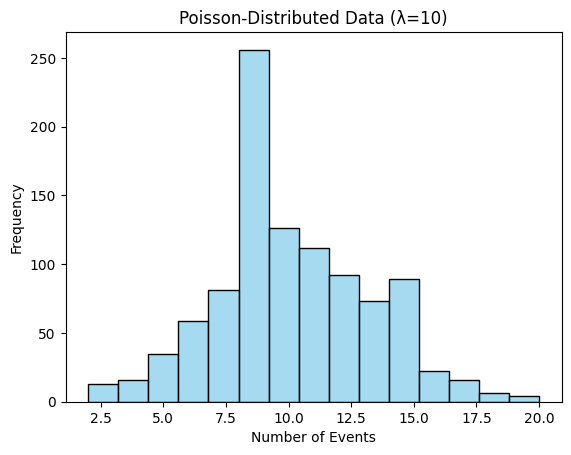

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate Poisson-distributed data with λ = 5
data = np.random.poisson(lam=10, size=1000)

# Plot the distribution
sns.histplot(data, bins=15, kde=False, color='skyblue', edgecolor='black')
plt.title("Poisson-Distributed Data (λ=10)")
plt.xlabel("Number of Events")
plt.ylabel("Frequency")
plt.show()


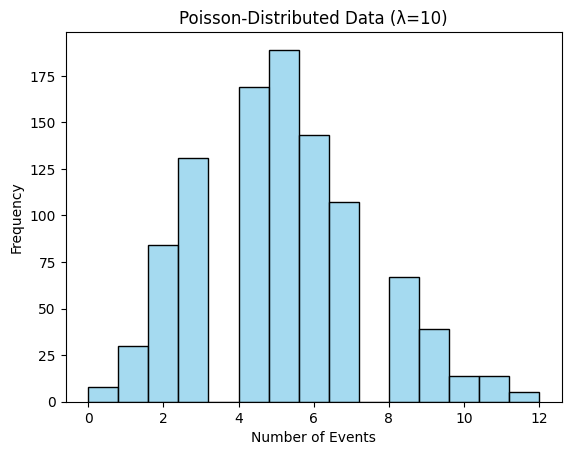

In [20]:

data = np.random.poisson(lam=5, size=1000)
sns.histplot(data, bins=15, kde=False, color='skyblue', edgecolor='black')
plt.title("Poisson-Distributed Data (λ=10)")
plt.xlabel("Number of Events")
plt.ylabel("Frequency")
plt.show()
